# Visualization


*...make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.*

**F. J. Anscombe, 1973**

(and echoed in nearly all talks about data visualization...)

# Anscombe's Quartet

![Anscombe's Quartet](figures/anscombe.png)

[Wikipedia on Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# Anscombe's Quartet - Reloaded

![DataDino](figures/DataDino.gif)

[DataSaurus Rex](https://www.autodeskresearch.com/publications/samestats)

[Justin Matejka	and George Fitzmaurice, *Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing*](https://dl.acm.org/citation.cfm?id=3025912)

# Overview

- Plotting Basics with ``matplotlib``
- Plotting complex data from ``pandas``
- Even more abstraction with ``seaborn``
- Map visualizations with ``folium``

# Other plotting libraries

- [ggpy](http://yhat.github.io/ggpy/)
- [HoloViews](http://holoviews.org/)
- [Altair](http://altair-viz.github.io/)
- [bokeh](https://bokeh.pydata.org)
- [plotly](https://plot.ly/python/)

# Matplotlib

- Multi-platform data visualization library built on NumPy 
- Works well on many operating systems / graphics backends
- Many output formats
- First version released in 2003 by [John D. Hunter](https://en.wikipedia.org/wiki/John_D._Hunter)
- Substantial support by Space Telescope Science Institute (researchers behind Hubble telescope)

## Importing Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.dpi'] = 400
matplotlib.rcParams['figure.figsize'] = [12,6]

## Three ways of plotting

- In Jupyter Notebook (Convenient, code and figures in one place)
- From Ipython Shell 
- From Python script (Reproducible, versionable code)


### Plotting from a script

Write a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.savefig('myplot.pdf')

plt.show()
```

Running this script from the command-line prompt will result in a window opening with your figure displayed:

```
$ python myplot.py
```
(On OSX you might need to try ``pythonw`` instead)

## Plotting from an IPython shell

IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, use the ``%matplotlib`` magic command:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

Any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.

To force an update of a plot, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

### Plotting from a Jupyter Notebook

- Like in IPython, use the ``%matplotlib`` magic command
- Two options of embedding graphics directly in the notebook:

    - ``%matplotlib notebook``:*interactive* plots
    - ``%matplotlib inline``: *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``

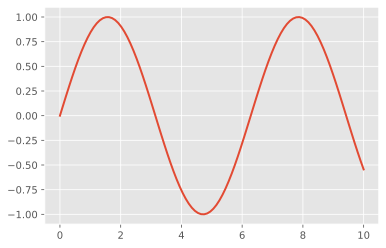

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-');

### Saving Figures to File

- Variety of output formats
- No need to call ``plt.show()`` before

In [3]:
fig.savefig('my_figure.png')

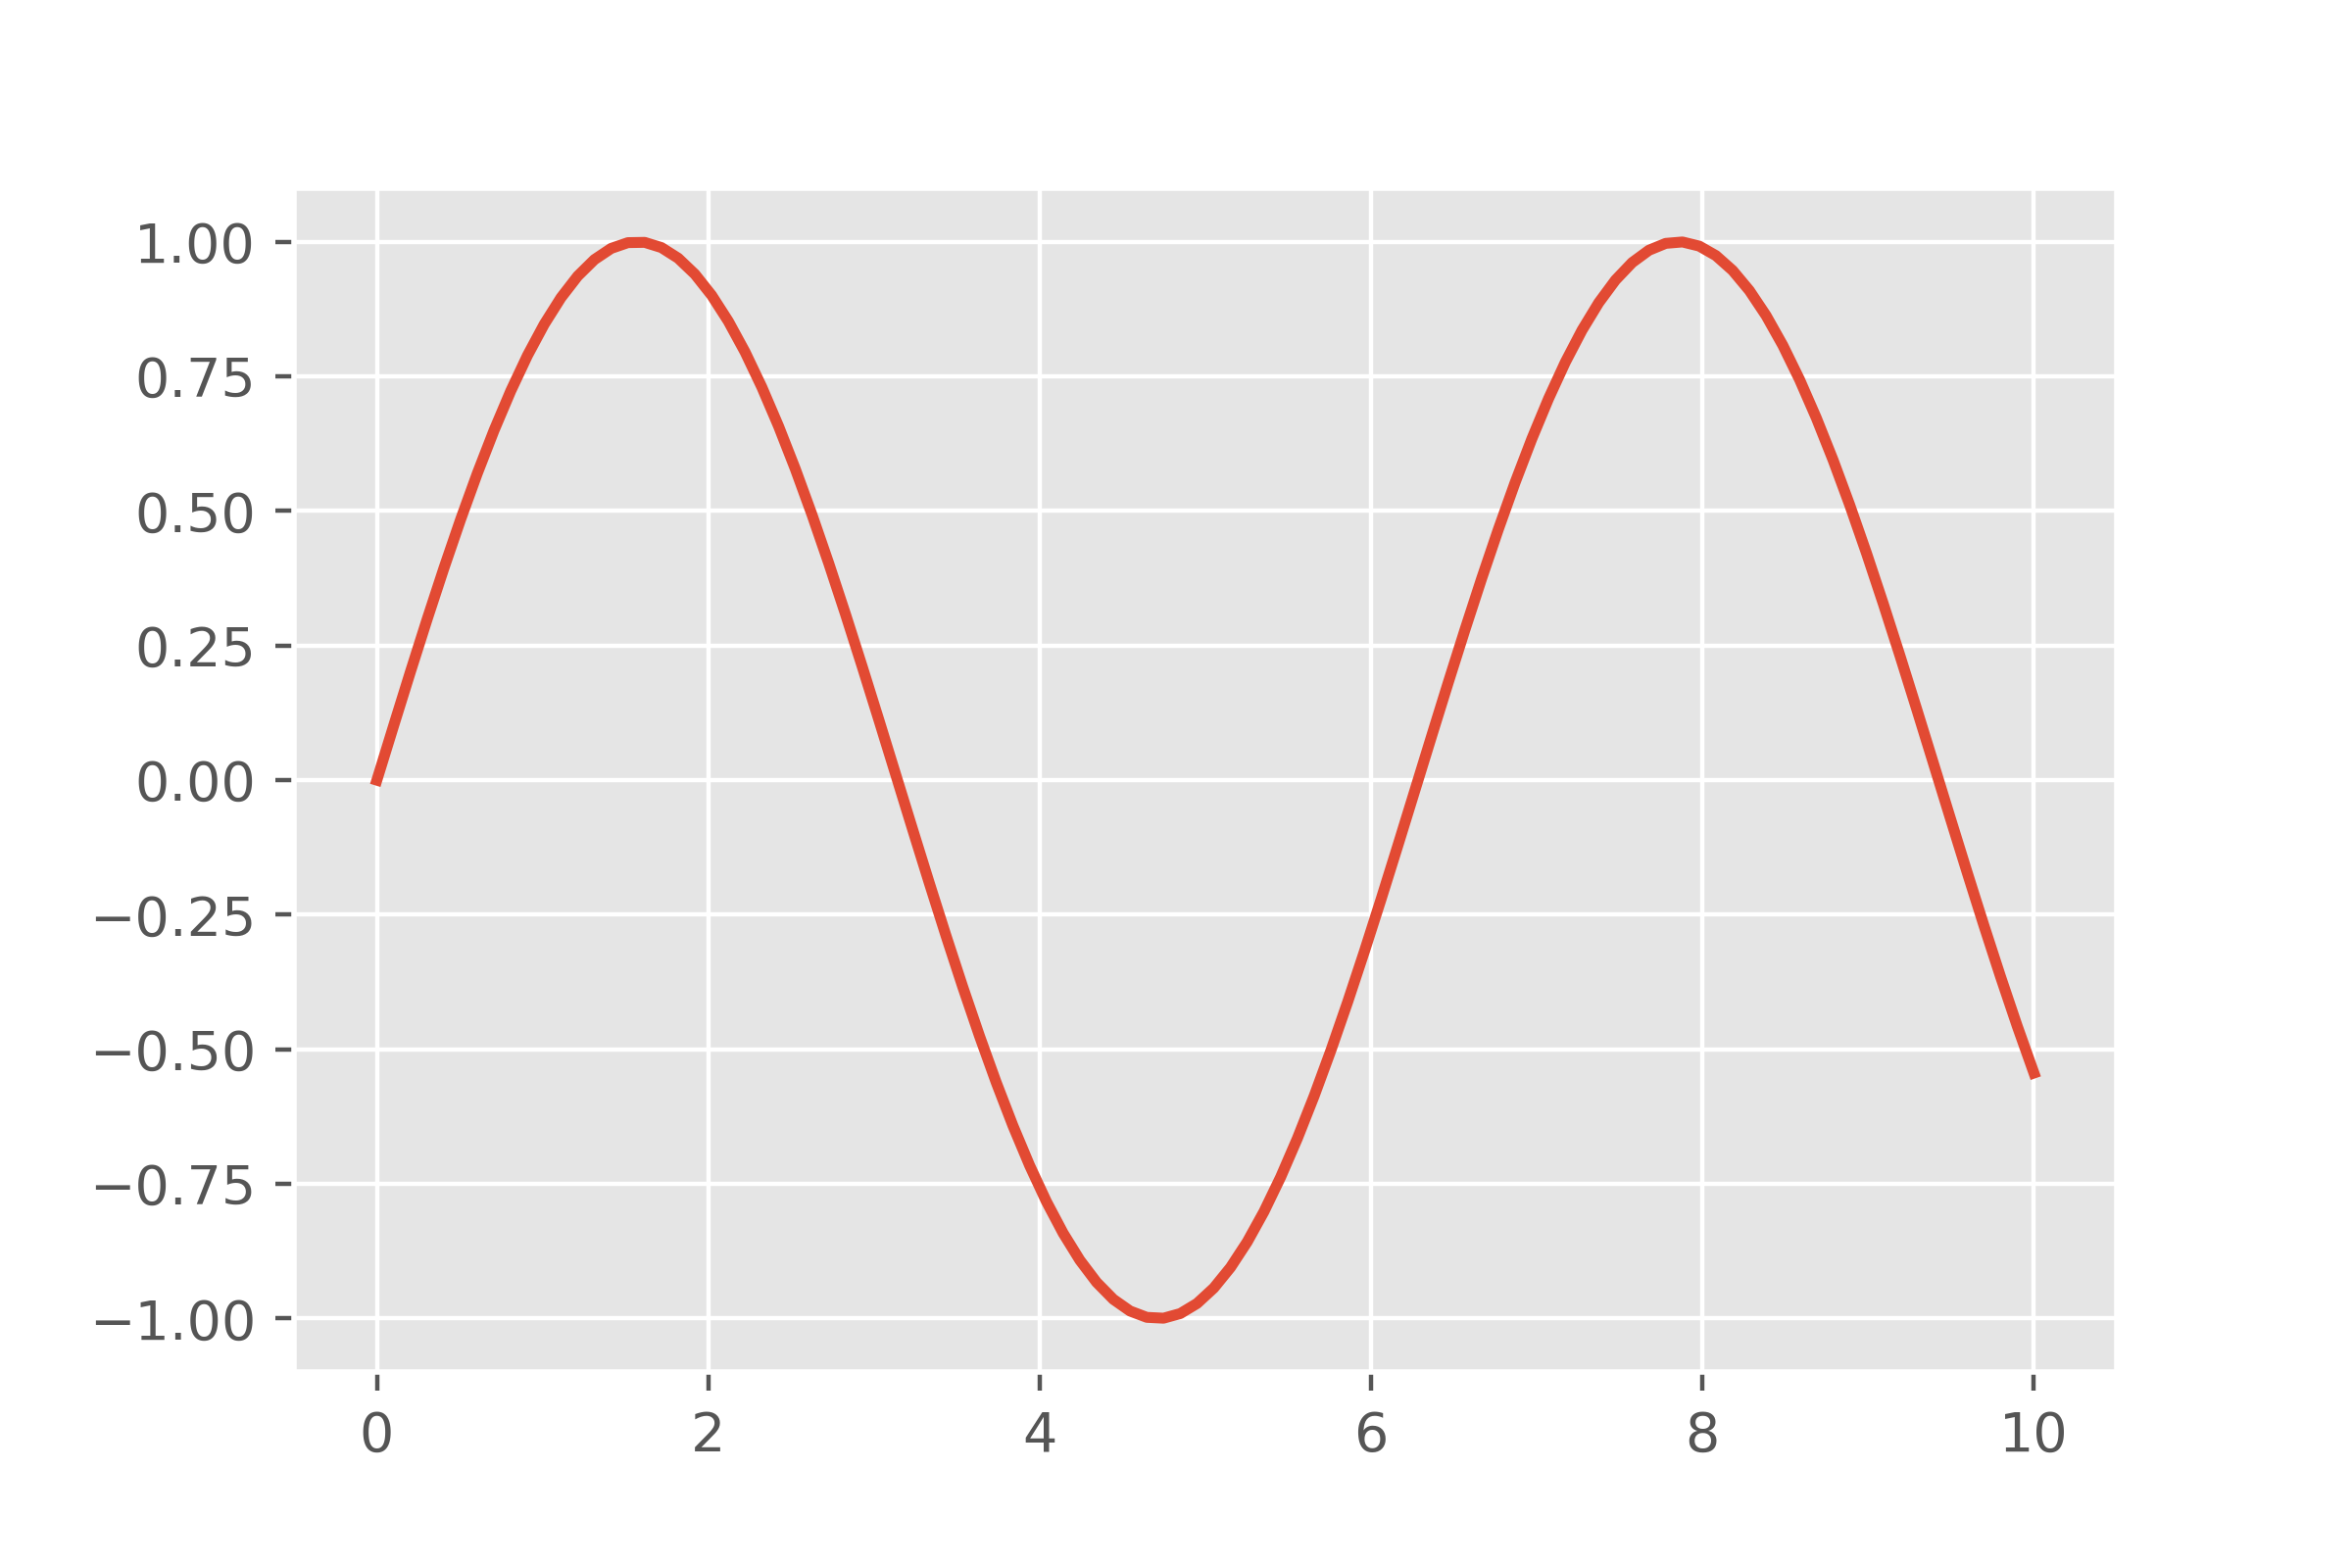

In [4]:
from IPython.display import Image
Image('my_figure.png')

In [5]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

### MATLAB Style API

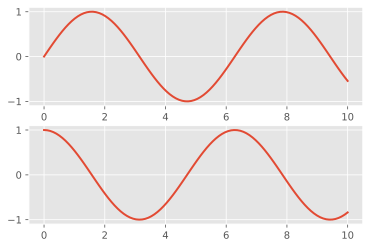

In [6]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object Oriented API

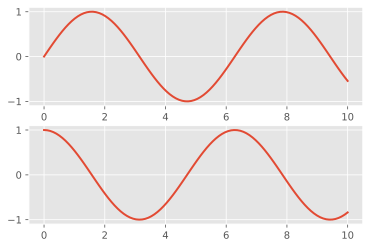

In [7]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Simple Line Plots

Simple here means functions of the type $y = f(x)$

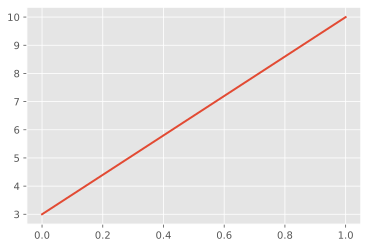

In [8]:
plt.plot([0,1],[3,10]);

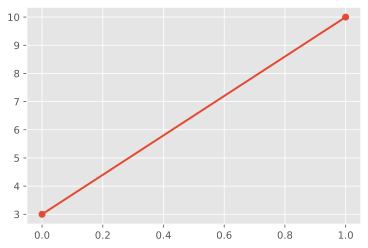

In [9]:
plt.plot([0,1],[3,10],'-o');

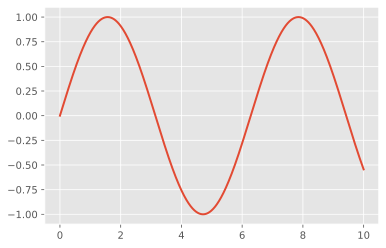

In [10]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));

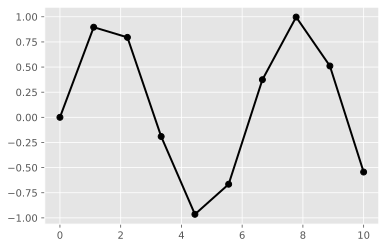

In [11]:
x = np.linspace(0, 10, 10)
plt.plot(x, np.sin(x), 'k-o');

### Line Styles

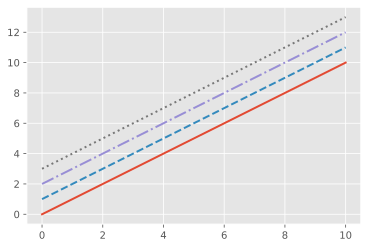

In [12]:
x = np.linspace(0, 10, 1000)
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');


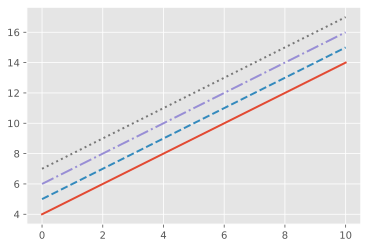

In [13]:
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

### Line Colors

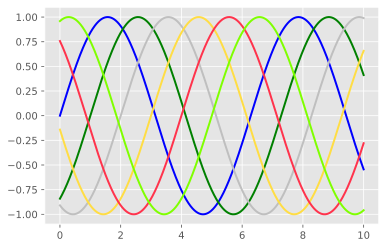

In [14]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

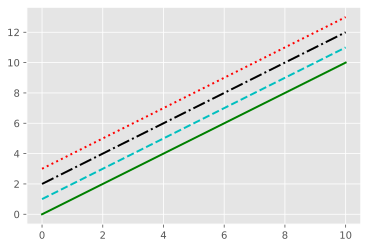

In [15]:
# If you really don't want to write a lot

x = np.linspace(0, 10, 1000)

plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

### Annotations

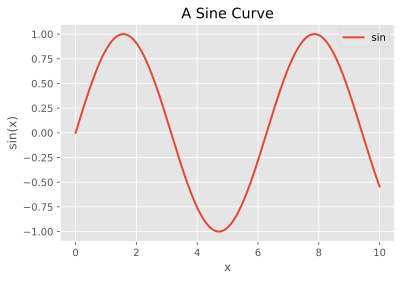

In [16]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.legend(["sin"])

### Axis Limit

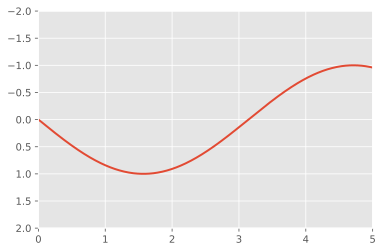

In [17]:
plt.plot(x, np.sin(x))
plt.xlim(0, 5)
plt.ylim(2, -2);

### For more on styles

[SciPy Lecture Notes on Matplotlib](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

## Scatter Plots


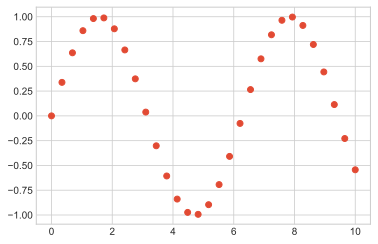

In [18]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o');

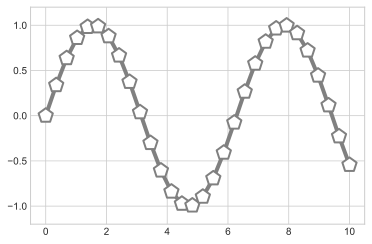

In [19]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## More Markers


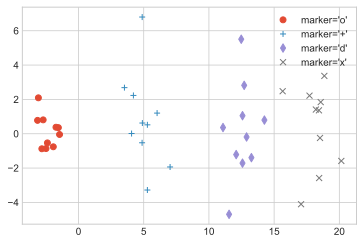

In [20]:
means = [-2,5,12,18]
stds = [1,5,6,3]
markers = ['o', '+', 'd', 'x']

plt.figure()
for mu,stdev,mark in zip(means,stds,markers):
    x = np.random.multivariate_normal([mu,0],np.diag([1,stdev]),10)
    plt.plot(x[:,0],x[:,1], mark, label="marker='{}'".format(mark))

plt.legend(numpoints=1);

## Visualizing Errors - Errorbars

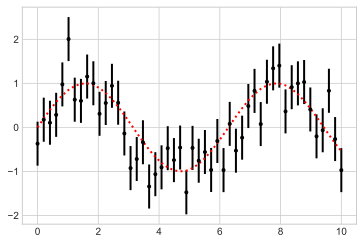

In [21]:
plt.style.use('seaborn-whitegrid')

N = 50
x = np.linspace(0, 10, N)
error = .5
y = np.sin(x)
y_measured = y + error * np.random.randn(N)

plt.plot(x, y, 'r:', label='true')
plt.errorbar(x, y_measured, yerr=error, fmt='.k', label='measured');

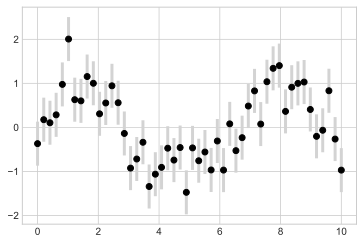

In [22]:
plt.errorbar(x, y_measured, yerr=error, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Visualizing Errors - Errortubes

We will look at an example of [Gaussian Process Regression](https://en.wikipedia.org/wiki/Gaussian_process)

Taken from [Scikit Learn Tutorials](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

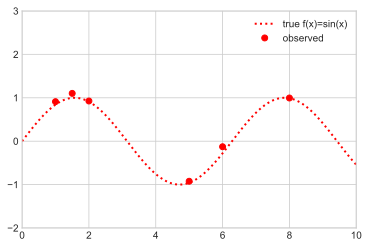

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def f(x):
    """The function to predict."""
    return np.sin(x)

xdata = np.array([[1, 1.5, 2, 5, 6, 8]]).T
ydata = f(xdata)
ydata_with_noise = ydata + .2 * np.random.random(ydata.shape)

xfit = np.linspace(0, 10, 1000)
plt.plot(xfit, f(xfit), 'r:', label='true f(x)=sin(x)')
plt.plot(xdata, ydata_with_noise, 'or', label='observed')

plt.xlim(0, 10);
plt.ylim(-2, 3);
plt.legend();

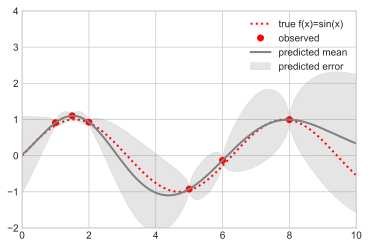

In [24]:
# Instantiate a Gaussian Process model
kernel = RBF(.5, (1e-2, 1e1))
gp = GaussianProcessRegressor(kernel=kernel)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(xdata, ydata_with_noise)

yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

plt.plot(xfit, f(xfit), 'r:', label='true f(x)=sin(x)')
plt.plot(xdata, ydata_with_noise, 'or', label='observed')
plt.plot(xfit, yfit, '-', color='gray', label='predicted mean')

plt.fill_between(xfit, yfit.flatten() - dyfit, yfit.flatten() + dyfit,
                 color='gray', alpha=0.2, label='predicted error')
plt.ylim(-2, 4);
plt.xlim(0, 10);
plt.legend();

## Examples with real data

[GapMinder](https://www.gapminder.org/data/)

In [25]:
import pandas as pd
# Get Gapminder Life Expectancy data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
data.to_csv("data/gapminder.csv",index=False)

In [26]:
df = pd.read_csv("data/gapminder.csv")
df.head()

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

### Plot Life Expectancy and Gross Domestic Product (GDP)


### Mean and Standard Deviations as Errorbars

Mean and Standard Deviation are often not as informative/robust as percentiles!

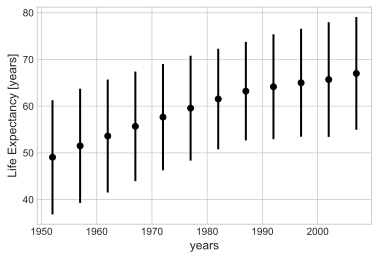

In [27]:
gdp_vs_life = df.groupby('year')\
    .agg({'gdpPercap':['mean', 'std'],'lifeExp':['mean','std']})

plt.errorbar(gdp_vs_life.index, 
             gdp_vs_life['lifeExp']['mean'], 
             yerr=gdp_vs_life['lifeExp']['std'], 
             fmt='o', color='black')

plt.xlabel("years")
plt.ylabel("Life Expectancy [years]");


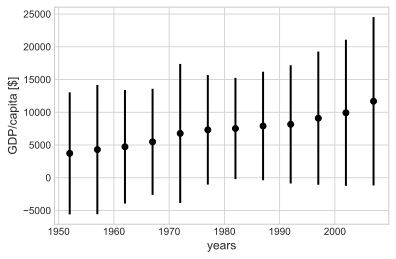

In [28]:
plt.errorbar(gdp_vs_life.index, 
             gdp_vs_life['gdpPercap']['mean'], 
             yerr=gdp_vs_life['gdpPercap']['std'], 
             fmt='o', color='black')

plt.xlabel("years")
plt.ylabel("GDP/capita [$]");

### Median and Percentiles as Errortubes

Mean and Standard Deviation are often not as informative/robust as percentiles!

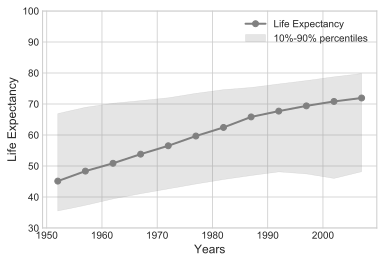

In [29]:
life_exp = pd.DataFrame({q:df.groupby('year')['lifeExp']\
                             .quantile(q) for q in [.1,.5,.9]})

years = life_exp.index.unique()

plt.plot(years, 
         life_exp[.5], 
         '-o', color='gray', label='Life Expectancy')

plt.fill_between(years, 
                 life_exp[.1],
                 life_exp[.9],
                 color='gray', alpha=0.2, label='10%-90% percentiles')
plt.legend()
plt.ylim(30,100)
plt.xlabel('Years')
plt.ylabel('Life Expectancy');

# Plotting from ``pandas``

- It's important to understand the plotting basics
 - for modifying details
 - for simple plots
- But with complex data, interactive visualization with ``matplotlib`` is tedious
- ``pandas`` allows to call ``matplotlib`` conveniently on DataFrames

In [30]:
df = pd.read_csv("data/gapminder.csv")
life_exp_per_continent = df[['year','continent','lifeExp']].groupby(['year','continent']).median().unstack()
life_exp_per_continent.columns = life_exp_per_continent.columns.droplevel(0)
life_exp_per_continent.head()

continent   Africa  Americas    Asia  Europe  Oceania
year                                                 
1952       38.8330    54.745  44.869  65.900   69.255
1957       40.5925    56.074  48.284  67.650   70.295
1962       42.6305    58.299  49.325  69.525   71.085
1967       44.6985    60.523  53.655  70.610   71.310
1972       47.0315    63.441  56.950  70.885   71.910

## Simple Line Plots

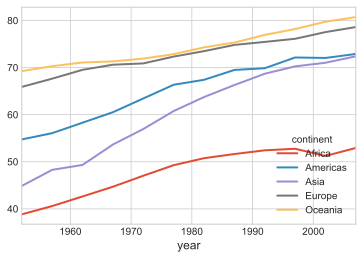

In [31]:
life_exp_per_continent.plot();

## Bar Plots

### Life Expectancy

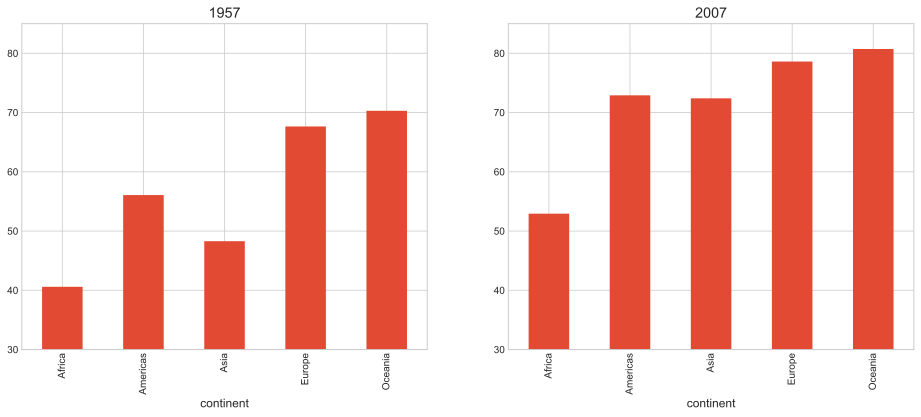

In [32]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
life_exp_per_continent.loc[1957].plot(kind='bar');
plt.title('1957');
plt.ylim([30,85]);
plt.subplot(1,2,2)
life_exp_per_continent.loc[2007].plot(kind='bar');
plt.title('2007');
plt.ylim([30,85]);

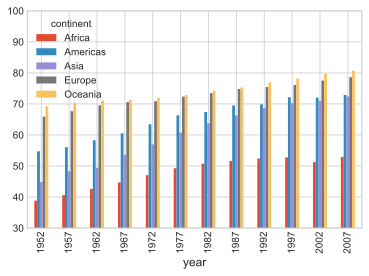

In [33]:
life_exp_per_continent.plot.bar();
plt.ylim([30,100]);

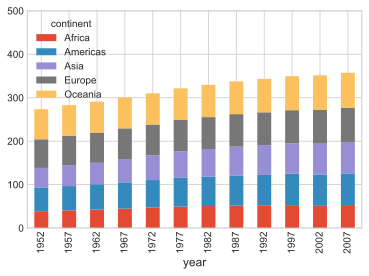

In [34]:
life_exp_per_continent.plot.bar(stacked=True);
plt.ylim([0,500]);

## Histograms

### Overall GDP

Text(0.5, 0, 'GDP/Capita')

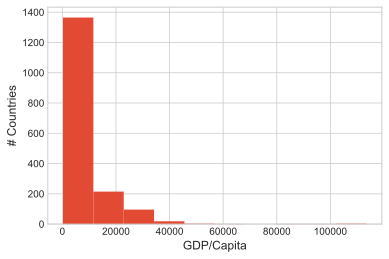

In [35]:
df['gdpPercap'].hist();
plt.ylabel("# Countries")
plt.xlabel("GDP/Capita")

### The differences in per capita GDP are huge

Few rich countries are much richer than the many poorer countries.

Plot is not very conclusive. How can we zoom in, without loosing the bigger picture?

### Log-Scaling Prior to Histogram Computation

Leads to log-scaled bins and more 'normal' looking distribution

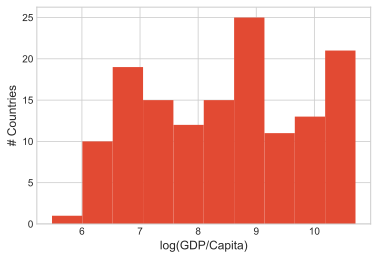

In [36]:
df.loc[df.year==2002, 'gdpPercap'].apply(np.log).hist();
plt.ylabel("# Countries")
plt.xlabel("log(GDP/Capita)");

### Log-Scaling Y-Axis

Linearly scaled bins but log-scaled histogram counts

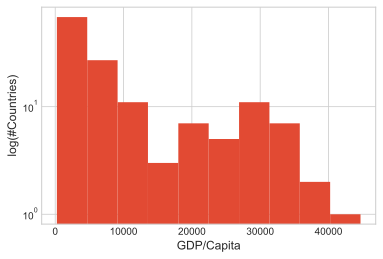

In [37]:
df.loc[df.year==2002, 'gdpPercap'].hist();
plt.yscale('log');
plt.ylabel('log(#Countries)');
plt.xlabel("GDP/Capita");

### GDP per Continent

In [38]:
gdp_per_continent = df[['year','continent','gdpPercap']]\
            .groupby(['year','continent']).median().unstack()
gdp_per_continent.columns = gdp_per_continent.columns.droplevel(0)
gdp_per_continent.head()

continent       Africa     Americas         Asia        Europe       Oceania
year                                                                        
1952        987.025569  3048.302900  1206.947913   5142.469716  10298.085650
1957       1024.022987  3780.546651  1547.944844   6066.721495  11598.522455
1962       1133.783677  4086.114078  1649.552153   7515.733737  12696.452430
1967       1210.376379  4643.393534  2029.228142   9366.067033  14495.021790
1972       1443.372508  5305.445256  2571.423014  12326.379990  16417.333380

### Box Plots

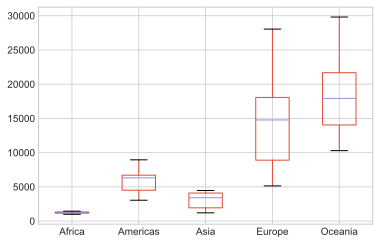

In [39]:
gdp_per_continent.plot.box();

### Histograms

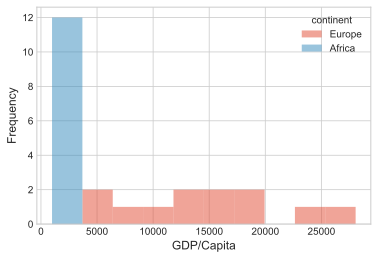

In [40]:
gdp_per_continent[['Europe','Africa']].plot.hist(alpha=0.5);
plt.xlabel("GDP/Capita");

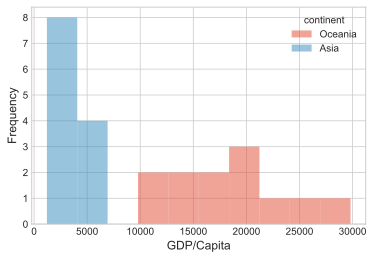

In [41]:
gdp_per_continent[['Oceania','Asia']].plot.hist(alpha=0.5);
plt.xlabel("GDP/Capita");

### Kernel Density Estimate Plots

Smoothed histograms

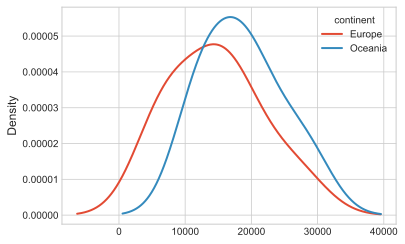

In [42]:
gdp_per_continent[['Europe','Oceania']].plot.kde();

# GapMinder Demo

In [43]:
data = pd.read_csv("data/gapminder.csv")
 
# Transform Continent into numerical values group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

def plot_gapminder(year, filename=''):
    fig = plt.figure()
    ax = plt.axes()
    year = data.loc[abs(data.year.unique() - year).argmin(),'year']
    # Change color for the x-axis values
    tmp=data[ data.year == year ]
    ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , 
               c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, 
               edgecolors="white")

    # Add titles (main and on axis)
    ax.set_yscale('log')
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("GDP per Capita")
    ax.set_title("Year: "+str(year) )
    ax.set_ylim(0,100000)
    ax.set_xlim(30, 90)
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

In [44]:
from ipywidgets import interact
import ipywidgets as widgets

def plot_gapminder_no_savefig(year):
    plot_gapminder(year, "")
    
interact(plot_gapminder_no_savefig, year=widgets.IntSlider(min=1952,max=2007,step=1,value=1952));

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952), Output()), _dom_classes=(…

/Users/felix/anaconda3/envs/pdds_1920/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


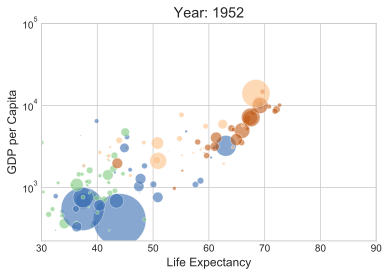

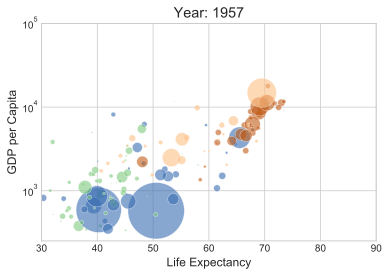

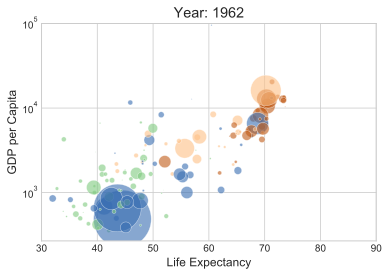

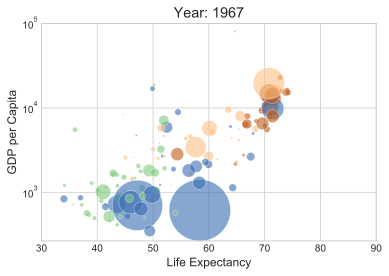

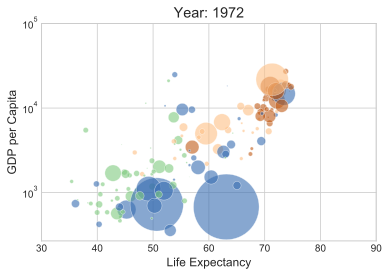

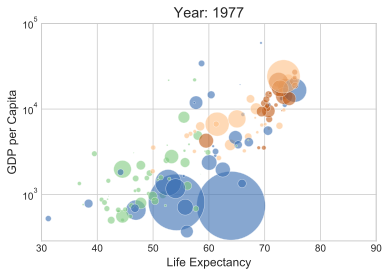

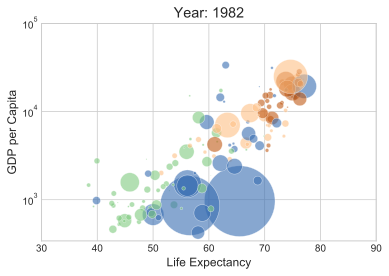

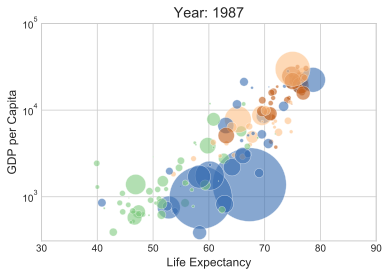

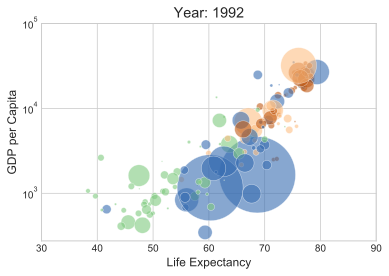

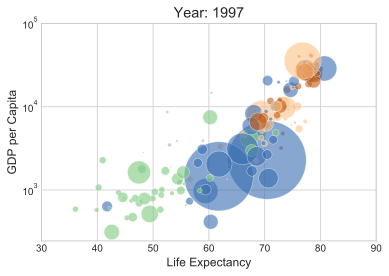

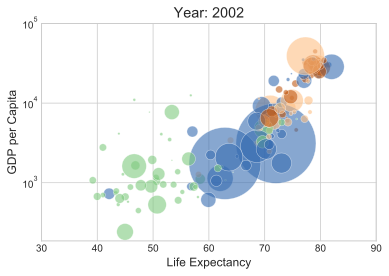

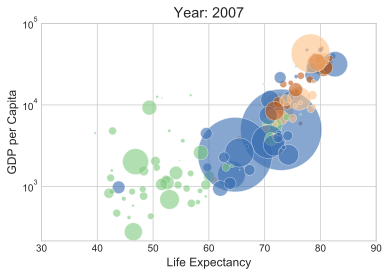

In [45]:

for year in data.year.unique():
    filename='plots/Gapminder_step'+str(year)+'.png'
    plot_gapminder(year, filename=filename)
    
    

## Life Expectancy vs GDP vs Time

![1952](plots/Gapminder_step1952.png)


## Life Expectancy vs GDP vs Time

![1962](plots/Gapminder_step1962.png)


## Life Expectancy vs GDP vs Time

![1972](plots/Gapminder_step1972.png)


## Life Expectancy vs GDP vs Time

![1982](plots/Gapminder_step1982.png)


## Life Expectancy vs GDP vs Time

![1992](plots/Gapminder_step1992.png)


## Life Expectancy vs GDP vs Time

![2002](plots/Gapminder_step2002.png)


# Plotting with ``seaborn``

- Matplotlib is too low level for complex interactive visualization
- ``pandas`` allows for simpler API
- Many great plots you'll find use abstractions on matplotlib

## KDE Plots


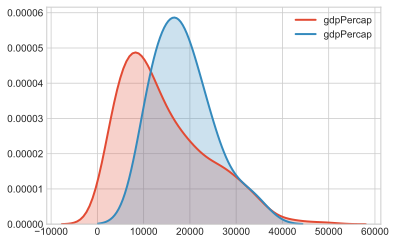

In [46]:
import seaborn as sns
data = pd.read_csv("data/gapminder.csv")
sns.kdeplot(data.loc[data.continent=='Europe','gdpPercap'], shade=True);
sns.kdeplot(data.loc[data.continent=='Oceania','gdpPercap'], shade=True);

## Histograms and Density Plots


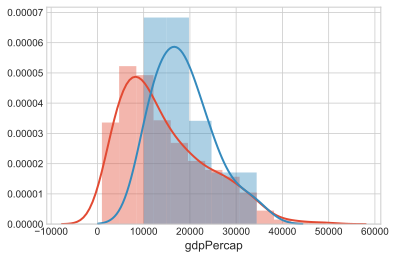

In [47]:
sns.distplot(data.loc[data.continent=='Europe','gdpPercap']);
sns.distplot(data.loc[data.continent=='Oceania','gdpPercap']);

## Violin Plots


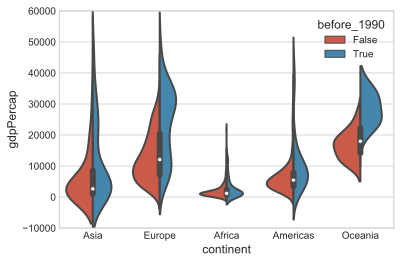

In [48]:
plt.figure(figsize=[6,4])
data['before_1990'] = data.year>2000
sns.violinplot( "continent", "gdpPercap", hue='before_1990', data=data, split=True);
plt.ylim([-10000, 60000]);


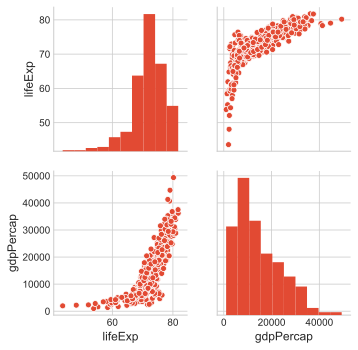

In [49]:

sns.pairplot(data.loc[data.continent=='Europe',['lifeExp','gdpPercap']]);


# Plotting Maps with ``folium``

- ``leaflet.js`` is a great javascript library for web based map visualizations
- ``folium`` let's you leverage python's flexibility with ``leaflet``'s visualization strengths

In [50]:
!pip install folium

In [51]:
import folium
m = folium.Map(location=[52.545195, 13.354670], zoom_start=16)
m

In [52]:
folium.Marker(
    location=[52.545195, 13.354670], popup='Where we are.',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[52.543941, 13.355539], popup='Where the ponies live.',
    icon=folium.Icon(icon='cloud')
).add_to(m)
m

# Stolpersteine (Stumbling Stones) Berlin

*A project of the artist Gunter Demnig commemorating all Jews, Roma and Sinti, Homosexuals, Dissidents, Jehova's Wittnesses and victims of Euthanasia who were deported and murdered by Nazis between 1933 and 1945.*

**a person is only forgotten when his or her name is forgotten**

[http://www.stolpersteine.eu/en/](http://www.stolpersteine.eu/en/)
[https://www.stolpersteine-berlin.de/en](https://www.stolpersteine-berlin.de/en)


![stolperstein](figures/stolperstein.jpg)

In [65]:
stolpersteine = pd.read_csv('data/stolpersteine.csv')
stolpersteine

Name               Address  \
0                   Kaufhaus Nathan Israel    Spandauer Str. 26-32   
1                          Kurt  Bujakowski         Weigandufer 30   
2      Bella (Anspach) Schweitzer (geb. Mai)   Innsbrucker Str. 32   
3                  Anna Aaron (geb. Bonwitt)     Kulmbacher Str. 7   
4     Irma Josefa Abarbanell (geb. Stransky)      Knesebeckstr. 32   
...                                      ...                   ...   
7987   Auguste Mathilde Zweig (geb. Emanuel)        Fasanenstr. 42   
7988         Clara Zwillenberg (geb. Singer)       Schützenstr. 53   
7989                   Siegmund Zwillenberg        Schützenstr. 53   
7990                       Vera Zwillenberg        Schützenstr. 53   
7991                           Arthur Zwirn     Karl-Marx-Str. 112   

            District    Year  
0              Mitte     NaN  
1           Neukölln  1902.0  
2         Schöneberg  1884.0  
3        Wilmersdorf  1876.0  
4     Charlottenburg  1882.0  
...              ...     ...  
7987     Wilmersdorf  1858.0  
7988        Steglitz  1893.0  
7989        Steglitz  1892.0  
7990        Steglitz  1922.0  
7991        Neukölln  1882.0  

[7992 rows x 4 columns]

In [25]:
import folium
m = folium.Map(location=[52.545195, 13.354670], zoom_start=16)
for idx, row in stolpersteine.sample(500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']], popup=row['Name']
    ).add_to(m)
m